In [69]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

main_df = pd.read_csv("f070 - Sheet1.csv")

In [70]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [71]:
num_of_peaks = 50
main_df.head()

,Signal1,Signal2,ID
0,37,13,0
1,36,39,1
2,25,30,2
3,13,40,3
4,2,37,4


In [72]:
len(main_df)

37936

In [73]:
avg = main_df["Signal1"].mean()
print("Average1 :",avg)
avg2 = main_df["Signal2"].mean()
print("Average2:",avg2)

Average1 : 25.427166807254324
Average2: 22.272142555883594


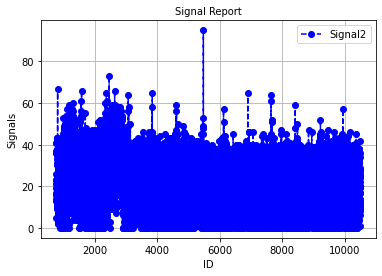

In [74]:
import csv
  
x = []
y1 = []
y2 = []
  
for i in range(754,10508):
    x.append(main_df["ID"][i])
    y1.append(main_df["Signal1"][i])
    y2.append(main_df["Signal2"][i])

  
  
plt.plot(x, y2, color = 'b', linestyle = 'dashed',
         marker = 'o',label = "Signal2")
  
plt.xlabel('ID')
plt.ylabel('Signals')
plt.title('Signal Report', fontsize = 10)
plt.grid()
plt.legend()
plt.show()


In [75]:
for i in range(len(main_df)):
    if(main_df.at[i,'Signal1']<avg and main_df.at[i,'Signal2']<avg2):
        main_df = main_df.drop(index = i)
        #print(i)

In [76]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [77]:
main_df.set_index("ID", inplace = True)
main_df.head()


,Signal1,Signal2
ID,,
0,37,13
1,36,39
2,25,30
3,13,40
4,2,37


In [78]:
len(main_df)

32795

Saving the raw data in a file

main_df.to_csv("f051ff_raw.csv")

In [79]:
limit = int(len(main_df)/num_of_peaks)
rms_id = []
rms_values = []
mean_values = []
kurtosis_values = []
sd_values = []
skew_values = []
rms_values2 = []
mean_values2 = []
kurtosis_values2 = []
sd_values2 = []
skew_values2 = []

In [80]:
for i in range(num_of_peaks):
    rms_id.append(i)  

In [81]:
from scipy import stats
from scipy.stats import kurtosis
for i in range(num_of_peaks):
    val = 0
    mean = 0
    val2 = 0
    mean2 = 0
    part_data_s1 = []
    part_data_s2 = []
    for j in range(limit):
        val = val + (main_df.at[i+j, 'Signal1'])*(main_df.at[i+j, 'Signal1'])
        mean = mean + (main_df.at[i+j, 'Signal1']) 
        val2 = val2 + (main_df.at[i+j, 'Signal2'])*(main_df.at[i+j, 'Signal2'])
        mean2 = mean2 + (main_df.at[i+j, 'Signal2']) 
        part_data_s1.append(main_df.at[i+j, 'Signal1'])
        part_data_s2.append(main_df.at[i+j, 'Signal2'])
    val = val/limit
    mean = mean/limit
    val2 = val2/limit
    mean2 = mean2/limit
    val = math.sqrt(val)
    val2 = math.sqrt(val)
    rms_values.append(val) 
    rms_values2.append(val2)
    mean_values.append(mean)
    mean_values2.append(mean2)
    kurtosis_values.append(kurtosis(part_data_s1)) 
    kurtosis_values2.append(kurtosis(part_data_s2))
    sd_values.append(stats.tstd(part_data_s1))
    sd_values2.append(stats.tstd(part_data_s2))
    skew_values.append(stats.skew(part_data_s1))
    skew_values2.append(stats.skew(part_data_s2))

In [82]:
print(rms_id) 
print(len(rms_id)) 
print(rms_values) 
print(len(rms_values))  
print(rms_values2) 
print(len(rms_values2)) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
50
[32.23823532381841, 32.208173065446296, 32.203266630566986, 32.2263701228933, 32.24228412343305, 32.24985945883336, 32.286219970755326, 32.32896274335242, 32.312359084695764, 32.331843306608015, 32.331843306608015, 32.28761490627448, 32.24240250173627, 32.27080073615577, 32.26559626428863, 32.288324172409375, 32.33200857704257, 32.326908414409004, 32.32258681356755, 32.330521112717115, 32.28834781434554, 32.26784375284495, 32.28222397439223, 32.28487226394487, 32.282625960898805, 32.315241127992614, 32.37188488947948, 32.3605640690985, 32.34246611660615, 32.39340711360077, 32.356624438253256, 32.370965220595096, 32.39333641776977, 32.358983556253634, 32.401983729678044, 32.388905837864385, 32.37469089716569, 32.42840616986221, 32.42840616986221, 32.39524515105491, 32.432807817097235, 32.40794361

In [83]:
print(rms_values2) 
print(len(rms_values2))  

[5.677872429336398, 5.675224494717923, 5.674792210342771, 5.676827469889613, 5.678228960110102, 5.678895971827038, 5.682096441521855, 5.685856377306098, 5.684396105541534, 5.686109681197507, 5.686109681197507, 5.682219188510285, 5.6782393839760115, 5.680739453289138, 5.680281354324681, 5.682281599182619, 5.68612421400048, 5.685675721882933, 5.685295666327965, 5.6859934147620255, 5.682283679502946, 5.680479183382768, 5.681744800181739, 5.681977847892833, 5.68178017534107, 5.684649604680364, 5.6896295915884965, 5.688634640148592, 5.687043706233156, 5.6915206328011125, 5.688288357516104, 5.689548771264299, 5.691514422170058, 5.688495719982009, 5.692274038526083, 5.69112518205885, 5.689876175908021, 5.694594469307029, 5.694594469307029, 5.6916821020727175, 5.694980932110066, 5.692797520729746, 5.692400266815918, 5.696759300036971, 5.6936910380954044, 5.6934263360644835, 5.697607620442685, 5.695743293770477, 5.695478877790526, 5.7000658152811035]
50


In [84]:
data = {'ID': rms_id,
        'rms':rms_values,
        'mean': mean_values,
        'kurtosis':kurtosis_values,
        'SD': sd_values,
        'skewness':skew_values,
        'rms2':rms_values2,
        'mean2': mean_values2,
        'kurtosis2':kurtosis_values2,
        'SD2': sd_values2,   
        'skewness2':skew_values2
       }
df = pd.DataFrame(data)

In [85]:
df.to_csv("f070_50.csv")